In [1]:
import pandas as pd
df=pd.read_csv("credit_1.csv")

In [2]:
x=df.drop("Class",axis=1)
y=df["Class"]

In [3]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x["Time"]=scaler.fit_transform(x[["Time"]])
x["Amount"]=scaler.fit_transform(x[["Amount"]])
print(x)

            Time        V1        V2        V3        V4        V5        V6  \
0      -2.000786 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388   
1      -2.000786  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361   
2      -2.000760 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499   
3      -2.000760 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203   
4      -2.000735 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921   
...          ...       ...       ...       ...       ...       ...       ...   
227842  1.675729 -1.781954  2.062680 -3.758871 -1.801001 -0.084365  1.919610   
227843  1.675729 -0.061507  1.024900 -0.170060 -0.263220  0.982164 -1.162749   
227844  1.675779  2.050034 -0.103557 -1.204713  0.207198  0.108850 -0.665621   
227845  1.675805  1.914027 -0.490068 -0.326111  0.604711 -0.850136 -0.736319   
227846  1.675830  2.152696 -0.036161 -2.231811  0.091766  0.537612 -1.368103   

              V7        V8        V9  .

In [4]:
x.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,-2.000786,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.234711
1,-2.000786,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.351831
2,-2.000760,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.149034
3,-2.000760,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.130440
4,-2.000735,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.083171


C:\Users\gss\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


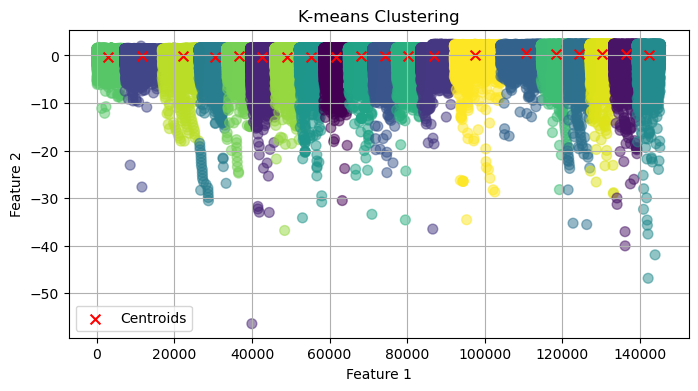

In [17]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Generate sample data with 3 clusters
# x,y = make_blobs(centers=5, random_state=42)
data = pd.read_csv("credit_1.csv")
x = data.values

# Instantiate KMeans with 3 clusters
kmeans = KMeans(n_clusters=20, random_state=42)

# Fit the model to the data
kmeans.fit(x)

# Predict the cluster labels
labels = kmeans.predict(x)

# Get the cluster centroids
centroids = kmeans.cluster_centers_

# Plot the clusters and centroids
plt.figure(figsize=(8, 4))
plt.scatter(x[:, 0], x[:, 1], c=labels, cmap='viridis', s=50, alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', c='red', s=50, label='Centroids')
plt.title('K-means Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True)
plt.show()


C:\Users\gss\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


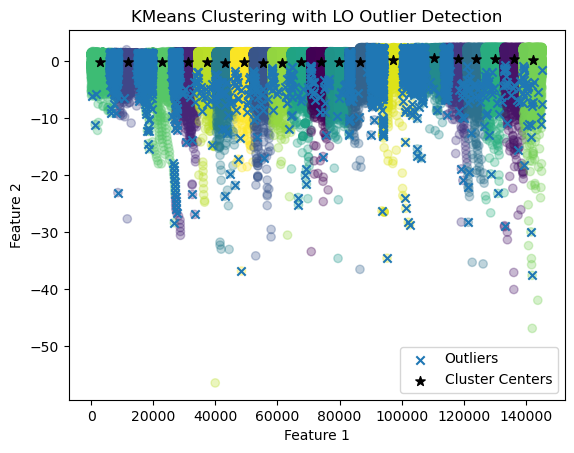

In [34]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from scipy.spatial.distance import cdist

# Generate sample data
#X, _ = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)
data = pd.read_csv("credit_1.csv")
X = data.values

# Apply KMeans clustering
kmeans = KMeans(n_clusters=20)
kmeans.fit(X)
labels = kmeans.labels_
centers = kmeans.cluster_centers_

# Calculate distances from each point to its cluster center
distances = cdist(X, centers, 'euclidean')
min_distances = np.min(distances, axis=1)

# Set a threshold for the distance to define outliers
threshold = np.percentile(min_distances, 95)  # Adjust the percentile as needed

# Identify outliers
outliers = X[min_distances > threshold]

# Plot the results
import matplotlib.pyplot as plt

plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', alpha=0.3)
plt.scatter(outliers[:, 0], outliers[:, 1], marker='x', label='Outliers')
plt.scatter(centers[:, 0], centers[:, 1], marker='*', s=50, color='black', label='Cluster Centers')
plt.legend()
plt.title('KMeans Clustering with LO Outlier Detection')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()


In [ ]:
#without outliers use-default create clusters count=8
#outliers use -default create cluster count=8 clusters+4 outliers
#use cluster count -10= 10 clusters+6 outliers=16